In [417]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import time
%matplotlib inline

#importing original dataset
data_orig = np.loadtxt('data/data_banknote_authentication.txt', delimiter=',')

In [418]:
#Dataset : 

print("Dataset : \n\n"+ str(data_orig))
print("\nDimensions of dataset : "+str(data_orig.shape))

Dataset : 

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]

Dimensions of dataset : (1372, 5)


In [419]:
#Seed for np.random
seed=4
np.random.seed(seed)    

In [420]:
#Shuffling imported original dataset
np.random.shuffle(data_orig)  

In [421]:
#Shuffled dataset
print("Shuffled dataset with (Seed "+str(seed) +") :\n\n"+str(data_orig))

Shuffled dataset with (Seed 4) :

[[  0.64295   7.1018    0.3493   -0.41337   0.     ]
 [  2.3066    3.5364    0.57551   0.41938   0.     ]
 [ -3.5741    3.944    -0.07912  -2.1203    1.     ]
 ...
 [  4.7285    2.1065   -0.28305   1.5625    0.     ]
 [  1.8799    2.4707    2.4931    0.37671   0.     ]
 [ -3.73    -12.9723   12.9817   -2.684     1.     ]]


In [422]:
#Extacting Y
y_orig = data_orig[:,-1]
print("Output Y   :"+str(y_orig))
print("Shape of Y : "+str(y_orig.shape))
print("Number of 0s : "+str(y_orig.shape[0]-np.sum(y_orig)))
print("Number of 1s : "+str(np.sum(y_orig)))

Output Y   :[0. 0. 1. ... 0. 0. 1.]
Shape of Y : (1372,)
Number of 0s : 762.0
Number of 1s : 610.0


In [423]:
#Getting rid of Rank 1 array
Y = np.reshape(y_orig,(y_orig.shape[0],1)).T    
print("Shape of Y: "+ str(Y.shape))

Shape of Y: (1, 1372)


In [424]:
#Extracting vectorized input feature X (transposed)
x_shuffled = data_orig[:,(0,1,2,3)].T
print("Input set : \n\n" +str(x_shuffled))

Input set : 

[[  0.64295   2.3066   -3.5741  ...   4.7285    1.8799   -3.73   ]
 [  7.1018    3.5364    3.944   ...   2.1065    2.4707  -12.9723 ]
 [  0.3493    0.57551  -0.07912 ...  -0.28305   2.4931   12.9817 ]
 [ -0.41337   0.41938  -2.1203  ...   1.5625    0.37671  -2.684  ]]


In [425]:
print(x_shuffled.shape)

(4, 1372)


In [426]:
def standardize(x):
    
    x_mean = np.mean(x,axis=1, keepdims=True)
    x_std = np.std(x, axis=1, keepdims=True)

    X = (x - x_mean)  #Python Broadcasting
    X = X/x_std
    
    return X

In [427]:
#Standardizing shuffled input X
X = standardize(x_shuffled)
print("Standardizd Input X : \n\n"+str(X))
print("\nMeans of features              : \n"+str(np.mean(X,axis=1,keepdims=True)))
print("\nStandard Deviation of features : \n"+str(np.std(X,axis=1,keepdims=True)))

Standardizd Input X : 

[[ 0.07362241  0.65905878 -1.41035226 ...  1.51132239  0.50890358
  -1.46521328]
 [ 0.88282402  0.27511033  0.34458475 ...  0.03138738  0.09346438
  -2.53875711]
 [-0.24331834 -0.19081465 -0.34275528 ... -0.39008775  0.25426095
   2.68868118]
 [ 0.37056899  0.76706991 -0.44215911 ...  1.31134866  0.74675325
  -0.71055607]]

Means of features              : 
[[-1.81260902e-17]
 [ 5.95571535e-17]
 [ 1.16524866e-17]
 [-4.66099462e-17]]

Standard Deviation of features : 
[[1.]
 [1.]
 [1.]
 [1.]]


Distribution feature 1 :


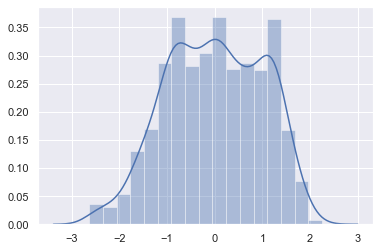

In [428]:
#Visualization
import seaborn as sns
sns.set(color_codes=True)
print("Distribution feature 1 :")
#sns.distplot(x_shuffled[0,:]);
sns.distplot(X[0,:])

In [429]:
#Splitting into Train, Test sets ( with a fixed seed )
train_split_percent = 80
test_split_percent = 20

train_X , test_X = X[:, : int( (train_split_percent/100)*X.shape[1])] , X[:,int( (train_split_percent/100)*X.shape[1]) : ]
train_Y , test_Y = Y[:, : int( (train_split_percent/100)*X.shape[1])] , Y[:,int( (train_split_percent/100)*X.shape[1]) : ]
print("Seed of Randomization   : "+str(seed))
print("\nShape of Training set X : "+str(train_X.shape))
print("Shape of Training set Y : "+str(train_Y.shape))
print("\nShape of Test set   X   : "+str(test_X.shape))
print("Shape of Test set Y     : "+str(test_Y.shape))

Seed of Randomization   : 4

Shape of Training set X : (4, 1097)
Shape of Training set Y : (1, 1097)

Shape of Test set   X   : (4, 275)
Shape of Test set Y     : (1, 275)


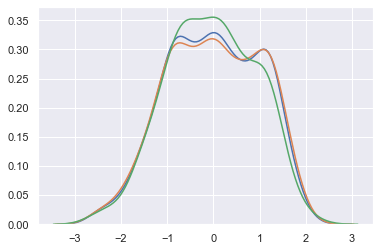

In [430]:
sns.distplot(X[0,:],hist=False)
sns.distplot(train_X[0,:],hist=False)
sns.distplot(test_X[0,:],hist=False)

In [431]:
m_train = train_X.shape[1]   #no. of training examples
m_test  = test_X.shape[1]    #no. of test examples
print("No of training examples : "+str(m_train))
print("No of test example      : "+str(m_test))

No of training examples : 1097
No of test example      : 275


In [432]:
#train_X = standardize(train_X)
print("Standardize train_X : "+str(train_X.shape)+"\n\n"+str(train_X))
print("\nMeans of features              : \n"+str(np.mean(train_X,axis=1,keepdims=True)))
print("\nStandard Deviation of features : \n"+str(np.std(train_X,axis=1,keepdims=True)))
#test_X  = standardize(test_X)
print("\n\nStandardize test_X : "+str(test_X.shape)+"\n\n"+str(test_X))

Standardize train_X : (4, 1097)

[[ 0.07362241  0.65905878 -1.41035226 ... -0.4252152   0.6923484
   0.047786  ]
 [ 0.88282402  0.27511033  0.34458475 ... -0.64755634 -0.05114332
   0.97275215]
 [-0.24331834 -0.19081465 -0.34275528 ...  0.23318613  0.37915479
   0.04126136]
 [ 0.37056899  0.76706991 -0.44215911 ...  1.10632519  0.90867704
  -0.96733535]]

Means of features              : 
[[ 0.01023727]
 [-0.01043503]
 [ 0.00669346]
 [ 0.01474598]]

Standard Deviation of features : 
[[1.01471405]
 [1.00779034]
 [1.01057318]
 [0.99252921]]


Standardize test_X : (4, 275)

[[-0.33145177  1.40610466  0.65297093 ...  1.51132239  0.50890358
  -1.46521328]
 [ 0.16118319 -0.72833143  0.30862032 ...  0.03138738  0.09346438
  -2.53875711]
 [-0.74468088  0.0712953  -0.17788892 ... -0.39008775  0.25426095
   2.68868118]
 [-0.50924644  1.00041385  0.37795383 ...  1.31134866  0.74675325
  -0.71055607]]


In [433]:
# Starting with our problem now

In [434]:
#First programming all helper function then will integrate the function

In [435]:
def sigmoid(Z):
    sigz= 1/(1+np.exp(-Z))
    sigz[sigz==1] = 0.999999999999
    sigz[sigz==0] = 0.000000000001
    return sigz    

In [436]:
#Initializing parameters
w, b = np.zeros(train_X.shape[1]), 0 
print("w : "+str(w))
print("b : "+str(b))

w : [0. 0. 0. ... 0. 0. 0.]
b : 0


In [449]:
def calculate(w,b,X,Y):
    m = X.shape[1]
   #Vectorized Implementation
    A = sigmoid(np.dot(w.T,X)+b)
    
    #Average of loss over m examples 
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))
    
    L2_cost = lambd2*(np.sum(np.square(w)))/(2*m)
    L1_cost = lambd1*(np.sum(np.abs(w)))/m
    cost = cost + L2_cost + L1_cost
    cost = np.squeeze(cost) 
    
    #Gradient
    w_temp=np.sign(w)
    
    l1_grad = (lambd1/m)*w_temp
    
    dw = (1/m)*np.dot(X,(A-Y).T) + (lambd2/m)*w  + l1_grad
    db = (1/m)*np.sum(A-Y)
    
    grads = { 'dw':dw, 'db':db}
    
    return cost, grads

In [438]:
def gradient_descent(w, b, X, Y, num_iterations, alpha, print_cost = False, print_after=100):
    
    costs = []
    for i in range(num_iterations):  
         
        alpha_decayed = alpha/(1+decay_rate*i)     
        cost, grads = calculate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        w = w-alpha_decayed*dw
        b = b-alpha_decayed*db
    
        if i%1000 ==0:
            costs.append(cost)
        if print_cost and i % print_after == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"w": w, "b": b}
    gradients = {"dw": dw, "db": db}
    
    return parameters, gradients, costs      
  

In [439]:
def predict(w, b, X):
    m= X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    A=sigmoid(np.dot(w.T,X)+b)
    assert(A.shape==(1,m))
    
    for i in range(A.shape[1]):
          Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
            
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [440]:
def evaluate(Y,Yhat,Set):
    spos=0
    
    for i in range(Y.shape[1]): 
        if Y[0,i]==1 and Yhat[0,i]==1:
            spos = spos+1
            
    p = spos /np.sum(Yhat == 1)
    r = spos/ np.sum( Y == 1)
    acc = np.mean(Y == Yhat)
    f1score = 2*p*r/(p+r)
    
    data = [{'Precision': p, 'Recall': r, 'Accuracy': acc,'F-score': f1score}] 
    df = pd.DataFrame(data)
    
    print("\n"+Set+":")
    display(df)
    
    return

In [441]:
def model(train_X, train_Y, test_X, test_Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False,print_after=100):

    w, b = np.zeros((4,1)),0
    tic = time.time()
    parameters, grads, costs = gradient_descent(w, b, train_X, train_Y, num_iterations, learning_rate, print_cost,print_after)
    

    w = parameters["w"]
    b = parameters["b"]
    

    test_Yhat = predict(w, b, test_X)
    train_Yhat = predict(w, b, train_X)
    
    toc= time.time()
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    evaluate(train_Y,train_Yhat,"Train ")
    evaluate(test_Y,test_Yhat,"Test ")

    time_t = (toc-tic)*1000
    print("Time taken by the model : "+str((toc-tic))+" sec")
    return 

Cost after iteration 0: 0.693147
Cost after iteration 2000: 0.033404
Cost after iteration 4000: 0.029088
Cost after iteration 6000: 0.027138
Cost after iteration 8000: 0.025962
Cost after iteration 10000: 0.025154
Cost after iteration 12000: 0.024557
Cost after iteration 14000: 0.024094
Cost after iteration 16000: 0.023721
Cost after iteration 18000: 0.023414
Cost after iteration 20000: 0.023156
Cost after iteration 22000: 0.022936
Cost after iteration 24000: 0.022746
Cost after iteration 26000: 0.022580
Cost after iteration 28000: 0.022434
Cost after iteration 30000: 0.022304
Cost after iteration 32000: 0.022188
Cost after iteration 34000: 0.022084


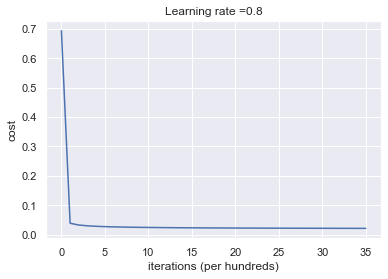


Train :


,Precision,Recall,Accuracy,F-score
0,0.98152,0.991701,0.988149,0.986584



Test :


,Precision,Recall,Accuracy,F-score
0,0.992248,1.0,0.996364,0.996109


Time taken by the model : 11.049882888793945 sec


In [448]:
lambd1 = 0 
lambd2 = 0

decay_rate=0
model(train_X, train_Y, test_X, test_Y, 
      num_iterations = 35001, learning_rate = 0.8, print_cost = True,print_after=2000)


# 